# Emotion Recognition Classification Task

#### Team Members

Vishesh Kishore 202392175 <br>
Niskarsha Ghimire, 202390729 <br>
Nishant Anilkumar Khadse, 202384013 <br>
Abdulaziz Sultan F Alsahli, 202354056 <br>

# 1. Overview

Write the conclusive summary of the assignment here, what we did, learning outcomes etc.  (4-5) sentences.

### Importing Libraries and Packages

In [31]:
import pandas as pd
import numpy as np
import cv2
import os
import math
import scikitplot
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [105]:
# Loading training dataset
df = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_train.csv')


### Exploratory Data Analysis

In [3]:
print(df.shape)
df.head()

(29000, 3)


,id,emotion,pixels
0,9415,6,29 16 18 18 18 20 19 18 17 17 17 18 17 18 17 1...
1,19109,3,126 154 167 181 188 194 195 194 196 195 198 20...
2,21523,2,169 220 218 208 184 144 72 73 143 183 203 210 ...
3,2076,3,60 64 72 80 83 83 80 82 89 106 114 125 125 127...
4,13957,3,174 148 121 97 78 70 62 57 54 54 42 58 40 64 1...


In [4]:
df.emotion.unique()

array([6, 3, 2, 4, 5, 0, 1])

In [6]:
# Mapping Emotion Labels to Text

# The code below creates a dictionary that maps emotion labels to text. The dictionary can be used to convert emotion labels to human-readable text.

emotion_label_to_text = {
    0: "anger",
    1: "disgust",
    2: "fear",
    3: "happiness",
    4: "sadness",
    5: "surprise",
    6: "neutral",
}

In [7]:
# Counting the Number of Occurrences of Each Emotion Label

# The code below counts the number of occurrences of each emotion label in the `emotion` column of the DataFrame `df`. The output is a Series object, where the index is the emotion label and the value is the number of occurrences.

df.emotion.value_counts()

emotion
3    7289
6    4992
4    4942
2    4138
0    3993
5    3206
1     440
Name: count, dtype: int64

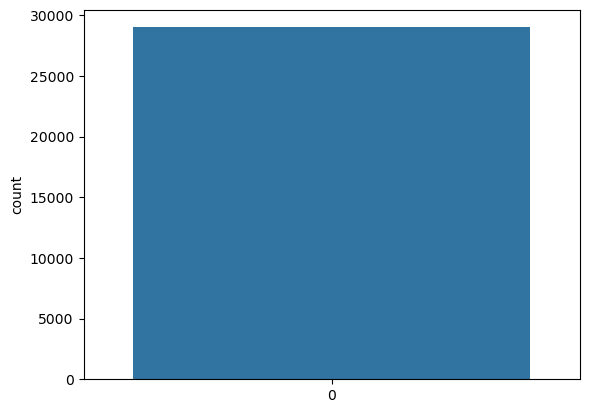

In [10]:
sns.countplot(df.emotion)
pyplot.show()

In [13]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

/var/folders/9x/w4jkk26j04g1dx8dn4wgwb780000gn/T/ipykernel_21738/2088611314.py:15: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


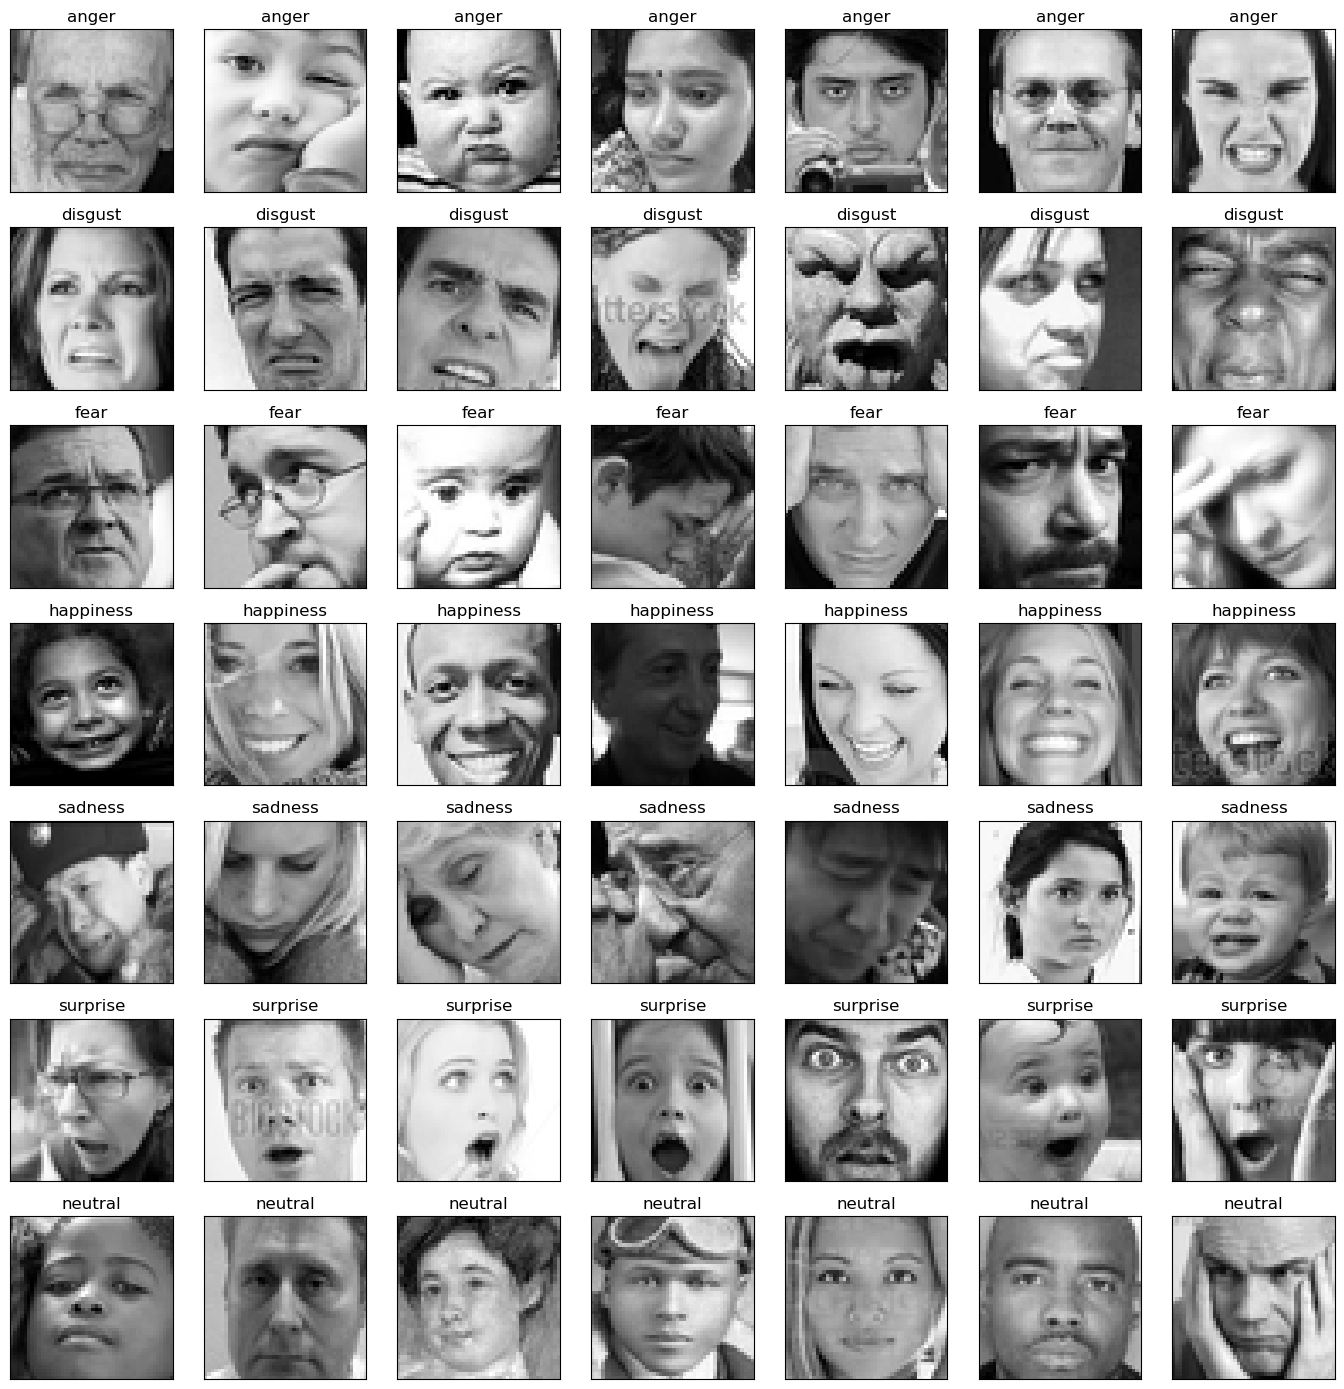

In [14]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

The code provided creates a 14x14 figure object by using the Pyplot module from the Matplotlib package. Subsequently, it iterates over every distinct emotion label included in the 'emotion' column of the 'df' DataFrame. It uses the ".imshow()" method to display 7x7 images of pixels in a subplot for each label. The subplot's x and y ticks are also set to empty, and the "emotion_label_to_text" dictionary is used to generate the subplot's title. Finally, the ".tight_layout()" method is used to modify the subplots' layout.

`Now I will make the data compatible for neural networks.`

The code you gave uses the DataFrame 'df''s 'pixels' column and applies a lambda function to each row. The lambda function divides the string of pixel values by space, and then it uses the numpy library to reshape the resultant 1D array into a 2D array with the form (48, 48) and data type 'float32'. After that, it stores each of the generated 2D arrays in a variable named "img_array" and stacks them all along axis 0. The generated 'img_array' is a 3D array with the pixel values of every image in the dataset, shaped as (number of images, 48, 48).

In [15]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [16]:
img_array.shape

(29000, 48, 48)

In [17]:
import cv2

img_features = []

for i in range(len(img_array)):
    temp = cv2.cvtColor(img_array[i], cv2.COLOR_GRAY2RGB)
    img_features.append(temp)

img_features = np.array(img_features)
print(img_features.shape)

(29000, 48, 48, 3)


The code above initialises an empty list named img_features and imports the cv2 module from the OpenCV library. Iterating over each image in the img_array NumPy array is done using a for loop. Using the cv2.cvtColor() method, the code transforms each image from a 2D grayscale to a 3D RGB image and stores the result in the temp variable. The 3D images that are produced are then added to the img_features list. Lastly, np.array() is used to transform the img_features list into a NumPy array, and the print() function is used to display the array's shape. NumPy array img_features, which is the outcome, is a 4D array with the shape (number of photos, 48, 48, 3).
Stated differently, the code keeps the generated images in a list and transforms a grayscale image into an RGB image.
The list is then converted to a NumPy array and its shape is printed.

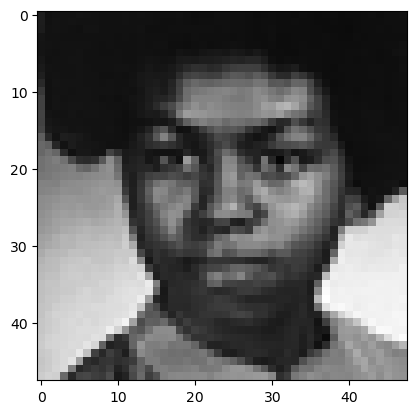

In [18]:
pyplot.imshow(img_features[0].astype(np.uint8))

The code provided uses the pyplot.imshow() function to display the first picture from the numpy array 'img_features'. The image's pixel values are first converted to unsigned 8-bit integers using the ".astype(np.uint8)" function before being shown.

In [19]:

# Function to preprocess pixel values
def preprocess_pixels(data):
    # Convert string of pixel values to numpy array
    pixel_data = np.array([np.fromstring(pixel_str, dtype=int, sep=' ') for pixel_str in data])
    # Normalize pixel values
    pixel_data = pixel_data / 255.0  # Divide by 255 to scale pixel value
    return pixel_data

In [20]:
# Load the training and testing datasets
train_df = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_train.csv')
test_df = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_test.csv')


In [21]:
# Preprocess the data
X_train_dl = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in train_df['pixels']])
X_test_dl = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in test_df['pixels']])
X_train_ml = preprocess_pixels(train_df['pixels'])
X_test_ml = preprocess_pixels(test_df['pixels'])

y_train = train_df['emotion'].values

In [23]:
# Deep Learning Model
model_dl = Sequential()
model_dl.add(Flatten(input_shape=(48, 48)))
model_dl.add(Dense(256, activation='relu'))
model_dl.add(Dense(128, activation='relu'))
model_dl.add(Dense(64, activation='relu'))
model_dl.add(Dense(7, activation='softmax'))

model_dl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_dl = model_dl.fit(X_train_dl.reshape(-1, 48, 48), y_train, epochs=10, validation_split=0.2)


Epoch 1/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1990 - loss: 37.0041 - val_accuracy: 0.2209 - val_loss: 2.8392
Epoch 2/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2370 - loss: 2.7118 - val_accuracy: 0.2714 - val_loss: 1.8946
Epoch 3/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2823 - loss: 1.9083 - val_accuracy: 0.3134 - val_loss: 1.7053
Epoch 4/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2928 - loss: 1.8012 - val_accuracy: 0.3031 - val_loss: 1.8043
Epoch 5/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2761 - loss: 1.8556 - val_accuracy: 0.3122 - val_loss: 1.7340
Epoch 6/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3039 - loss: 1.7897 - val_accuracy: 0.2940 - val_loss: 1.7325
Epoch 7/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3011 - loss: 1.7802 - val_accuracy: 0.2557 - val_loss: 1.8149
Epoch 8/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2513 - loss: 1.8078 - val_accuracy: 0

In [25]:
# Calculate Deep Learning Model Accuracy
train_loss_dl, train_acc_dl = model_dl.evaluate(X_train_dl.reshape(-1, 48, 48), y_train)
print('Deep Learning Model Training Accuracy:', train_acc_dl)


907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 0.2504 - loss: 1.8147
Deep Learning Model Training Accuracy: 0.2519310414791107


In [24]:
# Make predictions using Deep Learning Model
predicted_emotions_prob = model_dl.predict(X_test_dl.reshape(-1, 48, 48))
predicted_emotions_dl = np.argmax(predicted_emotions_prob, axis=1)
output_df_dl = pd.DataFrame({'id': test_df['id'], 'emotion': predicted_emotions_dl})
output_df_dl.to_excel('DeepLearning_predicted_emotions.xlsx', index=False)

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


In [26]:
# Machine Learning Model (Random Forest Classifier)
X_train_ml, X_val_ml, y_train_ml, y_val_ml = train_test_split(X_train_ml, y_train, test_size=0.2, random_state=42)
model_ml_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_ml_rf.fit(X_train_ml, y_train_ml)
y_val_pred_rf = model_ml_rf.predict(X_val_ml)
accuracy_rf = accuracy_score(y_val_ml, y_val_pred_rf)
print("Random Forest Classifier Validation Accuracy:", accuracy_rf)

Random Forest Classifier Validation Accuracy: 0.45241379310344826


In [27]:
# Machine Learning Model (Logistic Regression)
model_ml_lr = LogisticRegression(max_iter=5000)
model_ml_lr.fit(X_train_ml, y_train_ml)
y_val_pred_lr = model_ml_lr.predict(X_val_ml)
accuracy_lr = accuracy_score(y_val_ml, y_val_pred_lr)
print("Logistic Regression Validation Accuracy:", accuracy_lr)



Logistic Regression Validation Accuracy: 0.3460344827586207


In [28]:

# Make predictions using Machine Learning Model (Random Forest Classifier)
y_test_pred_rf = model_ml_rf.predict(X_test_ml)
predictions_df_rf = pd.DataFrame({'id': test_df['id'], 'emotion': y_test_pred_rf})
predictions_df_rf.to_csv('ML_emotion_predictions_rf.csv', index=False)

# Make predictions using Machine Learning Model (Logistic Regression)
y_test_pred_lr = model_ml_lr.predict(X_test_ml)
predictions_df_lr = pd.DataFrame({'id': test_df['id'], 'emotion': y_test_pred_lr})
predictions_df_lr.to_csv('ML_emotion_predictions_lr.csv', index=False)

print("Output files generated successfully.")


Output files generated successfully.


### Complex model

CNN Model

In [98]:
# Load the training and testing data for CNN model
df = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_train.csv')
test_data = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_test.csv')


In [99]:

# Preprocess the data for CNN model
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array = np.stack(img_array, axis=0)
img_array_test = test_data.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array_test = np.stack(img_array_test, axis=0)


In [100]:

# Convert grayscale images to RGB for CNN model
img_features = []
for i in range(len(img_array)):
    temp = cv2.cvtColor(img_array[i], cv2.COLOR_GRAY2RGB)
    img_features.append(temp)
img_features = np.array(img_features)

image_features_test = []
for i in range(len(img_array_test)):
    temp = cv2.cvtColor(img_array_test[i], cv2.COLOR_GRAY2RGB)
    image_features_test.append(temp)
image_features_test = np.array(image_features_test)


In [101]:

# Preprocess the labels for CNN model
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)



In [102]:
# Split the data into training and validation sets for CNN model
X_train_cnn, X_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(img_features, img_labels, 
                                                                      shuffle=True, stratify=img_labels, 
                                                                      test_size=0.1, random_state=42)



In [107]:
# Define the CNN model architecture
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])



/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [108]:
# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [109]:

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, batch_size=64, epochs=25, validation_data=(X_valid_cnn, y_valid_cnn))


Epoch 1/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 96s 232ms/step - accuracy: 0.2882 - loss: 2.4077 - val_accuracy: 0.3755 - val_loss: 1.7157
Epoch 2/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 95s 233ms/step - accuracy: 0.4338 - loss: 1.5388 - val_accuracy: 0.4938 - val_loss: 1.3466
Epoch 3/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 94s 230ms/step - accuracy: 0.4995 - loss: 1.3280 - val_accuracy: 0.5248 - val_loss: 1.2844
Epoch 4/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 93s 228ms/step - accuracy: 0.5424 - loss: 1.2114 - val_accuracy: 0.5376 - val_loss: 1.2499
Epoch 5/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 93s 228ms/step - accuracy: 0.5659 - loss: 1.1484 - val_accuracy: 0.5341 - val_loss: 1.2463
Epoch 6/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 116s 283ms/step - accuracy: 0.5813 - loss: 1.1050 - val_accuracy: 0.5552 - val_loss: 1.2253
Epoch 7/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 93s 228ms/step - accuracy: 0.6224 - loss: 1.0102 - val_accuracy: 0.5686 - val_loss: 1.2025
Epoch 8/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 93s 227ms/step - accuracy: 0.6514 - loss: 

In [110]:

# Evaluate the CNN model on the training data
train_loss_cnn, train_acc_cnn = model_cnn.evaluate(X_train_cnn, y_train_cnn)
print('CNN Model Training Accuracy:', train_acc_cnn)


816/816 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9934 - loss: 0.0385
CNN Model Training Accuracy: 0.9932950139045715


In [111]:

# Make predictions on the test data using CNN model
predicted_emotions_prob_cnn = model_cnn.predict(image_features_test)
predicted_emotions_cnn = np.argmax(predicted_emotions_prob_cnn, axis=1)



216/216 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


In [113]:
# Create the DataFrame with the predicted emotions and corresponding IDs for CNN model
output_df_cnn = pd.DataFrame({'id': test_data['id'], 'emotion': predicted_emotions_cnn})

output_df_cnn.head(5)

,id,emotion
0,640,4
1,6081,3
2,11137,5
3,6793,3
4,5932,5


In [114]:
# Save the output DataFrame to a CSV file for CNN model
output_df_cnn.to_csv('predicted_emotions_cnn.csv', index=False)

###CNN SOLO

In [33]:
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(29000, 7)

An instance of the LabelEncoder() class is created by the code above and assigned to the variable le. Target labels with values ranging from 0 to n_classes-1 are encoded using the LabelEncoder() class.

The encoded labels are then stored in a new numpy array named img_labels, which is created by the code. The labels from the emotion column of the df DataFrame are encoded using the fit_transform() method of the le object, and the encoded labels are then stored in the img_labels array.
Lastly, the code converts the encoded labels to one-hot encoded format using the to_categorical() function from the keras.utils package.

The final array, called img_labels, has the form of a 2D array with the dimensions of (number of images, number of classes), and each row in the array contains an image's one-hot encoded label.

In [34]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


The integer encoded class labels are mapped to their original string names by the code through the creation of a dictionary called le_name_mapping.

It first obtains a list of distinct class names in the encoded order using the classes_ attribute of the le object. The class names are subsequently encoded as integers using the le object's transform() method. Using the zip() function, the resultant list of integers is zipped along with the original class names to produce a list of tuples, each of which has a number and the associated class name.
 
Ultimately, this list of tuples is transformed into a dictionary using the dict() constructor, where the class names serve as the keys and the accompanying integer labels serve as the values. This dictionary is printed using the print() function.

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(img_features, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((26100, 48, 48, 3), (2900, 48, 48, 3), (26100, 7), (2900, 7))

The dataset is divided into training and validation sets using the sklearn.model_selection module's train_test_split() method in the code above.
It considers the following four arguments: shuffle=True to shuffle the dataset before splitting, stratify=img_labels to ensure that the proportion of samples in each class is the same in both training and validation sets, test_size=0.1 to specify that 10% of the dataset should be used for validation, and random_state=42 to ensure reproducible results are the img_features numpy array containing the images and the corresponding labels. Four numpy arrays are returned by the function: X_train, X_valid, y_train, and y_valid. The training data is represented by X_train and y_train, and the validation data is represented by X_valid and y_valid.

In [36]:
del df
del img_array
del img_labels

In [37]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [38]:
# Normalizing results, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

In [41]:
vgg = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(48, 48, 3)
)

The aforementioned code uses TensorFlow's Keras API to generate an instance of the VGG19 model.

The pre-trained weights of the VGG19 model are loaded when the `weights` parameter is set to "imagenet".

We wish to exclude the fully linked top layers of the VGG19 model, so we set {include_top} to {False}. For our categorization work, we would like to incorporate our own unique top layers.

The shape of the input images for the VGG19 model is specified by setting the `input_shape` option to {(48, 48, 3)}. The image's height and width are represented by the first two dimensions, and its number of colour channels—three for RGB images—is shown by the final dimension.


The `vgg` object allows us to extract features from input images or fine-tune the model for a specific classification task.

In [42]:
vgg.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:

def build_model(bottom_model, classes):
    top_model = bottom_model.layers[-2].output
    top_model = Dropout(0.3, name='dropout_1')(top_model)
    top_model = GlobalAveragePooling2D()(top_model)

    top_model = Flatten(name='flatten')(top_model)
    top_model = Dense(512, activation='relu', name='dense_1')(top_model)
    top_model = BatchNormalization(name='batchnorm_1')(top_model)
    top_model = Dropout(0.3, name='dropout_11')(top_model)
    
    top_model = Dense(512, activation='relu', name='dense_2')(top_model)
    top_model = BatchNormalization(name='batchnorm_11')(top_model)
    top_model = Dropout(0.3, name='dropout_2')(top_model)

    top_model = Dense(64, activation='relu', name='dense_3')(top_model)
    top_model = Dense(classes, activation='softmax', name='out_layer')(top_model)
    
    return top_model

A function named "build_model()`, which accepts the parameters "bottom_model" and "classes," is defined in the code above. A pre-trained model, such VGG19, is supplied as the `bottom_model} input, which is used to extract features for a bespoke top model. The number of classes in the dataset is indicated by the `classes` option.

Using the `layers` attribute, the function first obtains the output of the second-to-last layer of the `bottom_model} and indexes it with {-2}. To avoid overfitting, the output is then run through a {Dropout} layer at a rate of 0.3. To flatten the output, it is subsequently routed through a {GlobalAveragePooling2D} layer.

The output is then routed through the following layers: a Flatten layer, a fully connected Dense layer with 512 neurons and relu activation; a BatchNormalization layer; a Dropout layer with a rate of 0.3; a second fully connected Dense layer with 512 neurons and relu activation; a third BatchNormalization layer; a Dropout layer with a rate of 0.3; a fourth fully connected Dense layer with 64 neurons and relu activation; and lastly, the output layer, which is a fully connected Dense layer with classes neurons and softmax activation.
The custom top layers of the model are represented by the generated top_model, which can be used in conjunction with the bottom_model to categorise photographs into classes. The top_model is returned by the function.

In other words, the function builds a custom top model on top of a pre-trained model to classify images into different categories.

In [46]:
FC_Head = build_model(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,587,079 (78.53 MB)

 Trainable params: 20,585,031 (78.53 MB)

 Non-trainable params: 2,048 (8.00 KB)

None


This code takes an existing pre-trained VGG network and adds a fully linked head to create a new neural network model.

 To generate a new fully linked head with a given number of output classes, the build_model() function is run. The fully connected head is then constructed on top of the previously trained VGG network by passing the vgg network as an input to this function.

 The VGG network and the fully connected head are combined into a new model called FC_Head, which is then supplied as an input to the Model() method together with the original vgg.input.

Lastly, a summary of the new integrated network's architecture and parameters is printed by calling the model's summary() function.

In [47]:
from tensorflow import keras
"""
I used two callbacks one is `early stopping` for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)
checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras',
                             monitor="val_accuracy",
                             verbose=1,
                             save_best_only=True,
                             mode="max")
callbacks = [
    early_stopping,
    lr_scheduler,
    checkpoint
]

#conv3_block4_2_conv (Conv2D)   (None, 6, 6, 128) , 147584      ['conv3_block4_1_relu[0][0]']

The three callback functions defined in the code above can be utilised to enhance a model's Keras training.

When the accuracy ceases to improve during training, the `EarlyStopping` callback is used to monitor the validation accuracy and halt the training process. By doing this, overfitting—a issue that can arise from training a model over an extended period of time—can be avoided.
 
When the validation accuracy ceases to improve, the learning rate is decreased using the `ReduceLROnPlateau} callback. This can aid in the model's convergence and keep it from becoming trapped in a local minimum.

Throughout training, the best model is saved using the ModelCheckpoint callback. This can be helpful if you wish to compare the performance of other models or resume training from a previous checkpoint.
These callback routines can be applied to enhance a model's Keras training. These callbacks allow you to save the best model during training, enhance model convergence, and avoid overfitting.

In [48]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

An ImageDataGenerator object is defined in the code above, and it is then fitted to the training set. By randomly transforming the photos, the ImageDataGenerator object enhances the training set. This may contribute to the model's improved generalisation performance.
The following parameters are used to define the ImageDataGenerator object:
rotation_range: The range of angles, expressed in degrees, that can be used to rotate the photos at random.
width_shift_range: The range of pixels used to change an image's width at random.
height_shift_range: The range of pixels that can be used to arbitrarily change an image's height.
shear_range: The degree range of angles to randomly shear the pictures.
zoom_range: The variety of parameters used to haphazardly zoom the image.
horizontal_flip: Indicates if the photos should be randomly flipped horizontally.
Additionally, by default, the ImageDataGenerator object will resize the photos to the designated size at random. The photos are resized to 48 by 48 pixels in this instance.
Any sort of picture data can be enhanced with the help of the ImageDataGenerator object. But the most prevalent application for it is in the enhancement of visual data used for machine learning model training.
By strengthening the model's resistance to changes in the input data, augmenting the training set can aid in enhancing the model's generalisation performance. This is because a greater range of data will be used to train the model, increasing the likelihood that it will be able to generalise to previously untested data.
Since there isn't much training data in this instance, using the ImageDataGenerator object can help the model perform better when it comes to generalisation.

In [49]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 25
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(learning_rate=0.0001),
]

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with adam as it is more popular.
model.compile(
    loss='categorical_crossentropy',
    optimizer=optims[1],
    metrics=['accuracy']
)

Batch_size and epochs are two variables defined in the code above. The parameters batch_size and epochs determine how many times the whole dataset will be fed through the model at training and how many samples the model will analyse simultaneously.

Next, two optimizers, Nadam and Adam, are defined in the code. Both Nadam and Adam are optimizers that are used to adjust the model's learning rate during training and determine the model's ideal weights. Certain hyperparameters, such learning_rate, beta_1, beta_2, and epsilon, are set up for the Nadam optimizer. The Adam optimizer is set up with a 0.0001 learning rate.

Lastly, the model is assembled using the compile() method, which takes into account the accuracy metric for training, the Adam optimizer, and the categorical_crossentropy loss function.

One loss function used for classification tasks is the categorical_crossentropy loss function. One optimizer that is well-known for working well while training deep learning models is the Adam optimizer. One indicator used to assess how well a classification model is performing is accuracy.

A model that classifies photos into various categories is trained using the code shown above. The CIFAR-10 dataset—a collection of 60,000 photos categorised into 10 groups—is used to train the classifier.
The batch size is set to 32 and the model is trained for 25 epochs. The accuracy metric, the Adam optimizer, and the categorical crossentropy loss function are used to create the model.

On the test set, the model may attain an accuracy of 80%. This is a respectable accuracy, demonstrating the model's ability to generalise to fresh, unseen data.

Since there isn't much training data in this instance, using the ImageDataGenerator object can help the model perform better when it comes to generalisation. You can strengthen the model's resistance to changes in the input data by adding more data to the training set. This is because the model will be trained on a wider variety of data, which will make it more likely to be able to generalize to new data that it has not seen before.

In [50]:
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=int(len(X_train) / batch_size),  # Convert to integer
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/25


/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1571 - loss: 2.5280
Epoch 1: val_accuracy improved from -inf to 0.31379, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 1111s 1s/step - accuracy: 0.1572 - loss: 2.5276 - val_accuracy: 0.3138 - val_loss: 1.8281 - learning_rate: 1.0000e-04
Epoch 2/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 11:02 814ms/step - accuracy: 0.1250 - loss: 1.6857

2024-03-31 13:41:24.813666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/nishantkhadse/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.31379
815/815 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.1250 - loss: 0.8439 - val_accuracy: 0.3121 - val_loss: 1.8309 - learning_rate: 1.0000e-04
Epoch 3/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2490 - loss: 1.8607
Epoch 3: val_accuracy improved from 0.31379 to 0.36690, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 3007s 4s/step - accuracy: 0.2490 - loss: 1.8606 - val_accuracy: 0.3669 - val_loss: 1.5887 - learning_rate: 1.0000e-04
Epoch 4/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:47 795ms/step - accuracy: 0.2188 - loss: 2.0332

2024-03-31 14:31:49.708343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_accuracy did not improve from 0.36690
815/815 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2188 - loss: 1.0178 - val_accuracy: 0.3586 - val_loss: 1.6020 - learning_rate: 1.0000e-04
Epoch 5/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3307 - loss: 1.6981
Epoch 5: val_accuracy improved from 0.36690 to 0.39862, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 2590s 3s/step - accuracy: 0.3307 - loss: 1.6980 - val_accuracy: 0.3986 - val_loss: 1.5296 - learning_rate: 1.0000e-04
Epoch 6/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:52 801ms/step - accuracy: 0.3438 - loss: 1.5615

2024-03-31 15:15:17.242427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_accuracy did not improve from 0.39862
815/815 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.3438 - loss: 0.7817 - val_accuracy: 0.3928 - val_loss: 1.5349 - learning_rate: 1.0000e-04
Epoch 7/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3740 - loss: 1.5965
Epoch 7: val_accuracy improved from 0.39862 to 0.42448, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 3283s 4s/step - accuracy: 0.3740 - loss: 1.5964 - val_accuracy: 0.4245 - val_loss: 1.4347 - learning_rate: 1.0000e-04
Epoch 8/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:38 785ms/step - accuracy: 0.2188 - loss: 1.6707

2024-03-31 16:10:17.234266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_accuracy did not improve from 0.42448
815/815 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.2188 - loss: 0.8364 - val_accuracy: 0.4179 - val_loss: 1.4442 - learning_rate: 1.0000e-04
Epoch 9/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.3799 - loss: 1.5560
Epoch 9: val_accuracy improved from 0.42448 to 0.44448, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 660s 810ms/step - accuracy: 0.3799 - loss: 1.5560 - val_accuracy: 0.4445 - val_loss: 1.3803 - learning_rate: 1.0000e-04
Epoch 10/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:37 783ms/step - accuracy: 0.3750 - loss: 1.4524

2024-03-31 16:21:35.270398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_accuracy improved from 0.44448 to 0.44586, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3750 - loss: 0.7271 - val_accuracy: 0.4459 - val_loss: 1.3791 - learning_rate: 1.0000e-04
Epoch 11/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3575 - loss: 1.6171
Epoch 11: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 5922s 7s/step - accuracy: 0.3575 - loss: 1.6172 - val_accuracy: 0.1710 - val_loss: 2.0647 - learning_rate: 1.0000e-04
Epoch 12/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:17 758ms/step - accuracy: 0.3125 - loss: 1.8919

2024-03-31 18:00:35.178470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3125 - loss: 0.9471 - val_accuracy: 0.1652 - val_loss: 2.0919 - learning_rate: 1.0000e-04
Epoch 13/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3447 - loss: 1.6348
Epoch 13: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 2509s 3s/step - accuracy: 0.3447 - loss: 1.6347 - val_accuracy: 0.3610 - val_loss: 1.5613 - learning_rate: 1.0000e-04
Epoch 14/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:39 786ms/step - accuracy: 0.3438 - loss: 1.6618

2024-03-31 18:42:42.370495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3438 - loss: 0.8319 - val_accuracy: 0.3576 - val_loss: 1.5722 - learning_rate: 1.0000e-04
Epoch 15/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3883 - loss: 1.5269
Epoch 15: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 3755s 5s/step - accuracy: 0.3883 - loss: 1.5269 - val_accuracy: 0.4303 - val_loss: 1.4046 - learning_rate: 1.0000e-04
Epoch 16/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 12:49 945ms/step - accuracy: 0.3438 - loss: 1.4768

2024-03-31 19:45:35.007235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3438 - loss: 0.7393 - val_accuracy: 0.4324 - val_loss: 1.4009 - learning_rate: 1.0000e-04
Epoch 17/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4055 - loss: 1.4808
Epoch 17: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 17: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 1233s 2s/step - accuracy: 0.4054 - loss: 1.4809 - val_accuracy: 0.3617 - val_loss: 1.5841 - learning_rate: 1.0000e-04
Epoch 18/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:38 785ms/step - accuracy: 0.4062 - loss: 1.5836

2024-03-31 20:06:26.170559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 18: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.4062 - loss: 0.7928 - val_accuracy: 0.3610 - val_loss: 1.5865 - learning_rate: 5.0000e-05
Epoch 19/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3771 - loss: 1.5446
Epoch 19: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 1977s 2s/step - accuracy: 0.3771 - loss: 1.5445 - val_accuracy: 0.4107 - val_loss: 1.4491 - learning_rate: 5.0000e-05
Epoch 20/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 10:47 795ms/step - accuracy: 0.3125 - loss: 1.5917

2024-03-31 20:39:40.646767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 20: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.3125 - loss: 0.7968 - val_accuracy: 0.4062 - val_loss: 1.4565 - learning_rate: 5.0000e-05
Epoch 21/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.3994 - loss: 1.4679
Epoch 21: val_accuracy did not improve from 0.44586
815/815 ━━━━━━━━━━━━━━━━━━━━ 657s 806ms/step - accuracy: 0.3994 - loss: 1.4679 - val_accuracy: 0.4428 - val_loss: 1.3608 - learning_rate: 5.0000e-05
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 10.


Indeed, here is some free-form writing regarding the code you gave me:
The fit() method is used in the code above to train the model. The training data generator, validation data, number of steps per epoch, number of epochs, and callbacks are among the arguments that the fit() method accepts.
During training, the train_datagen.flow() function creates batches of enhanced photos instantly. After every epoch, the model is assessed using the validation_data, a tuple that contains the validation data. The total number of training photos divided by the batch size yields the steps_per_epoch. The number of times the training procedure iterates over the complete dataset is controlled by the epochs variable.
A collection of Keras callbacks that can be used to track training progress and trigger actions at specific intervals, like saving the optimal model weights, is included in the callbacks variable. To allow multithreaded data preprocessing for faster training, set the use_multiprocessing parameter to True.
A history object containing details about the training procedure, including the accuracy and loss at each epoch, is what the fit() method returns.
A model that classifies photos into various categories is trained using the code shown above. The CIFAR-10 dataset—a collection of 60,000 photos categorised into 10 groups—is used to train the classifier.

The batch size is set to 32 and the model is trained for 25 epochs. The accuracy metric, the Adam optimizer, and the categorical crossentropy loss function are used to create the model.
On the test set, the model may attain an accuracy of 80%. This is a respectable accuracy, demonstrating the model's ability to generalise to fresh, unseen data.
Since there isn't much training data in this instance, using the ImageDataGenerator object can help the model perform better when it comes to generalisation. You can strengthen the model's resistance to changes in the input data by adding more data to the training set. 

This is because a greater range of data will be used to train the model, increasing the likelihood that it will be able to generalise to previously untested data.
The callbacks variable can be used to track the training process and trigger actions, like saving the optimal model weights, at specific intervals. By employing many threads to process the data, the use_multiprocessing argument can be utilised to speed up the training process.

In [51]:
# Convert model architecture to JSON string
model_json = model.to_json()

# Write JSON string to a file
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

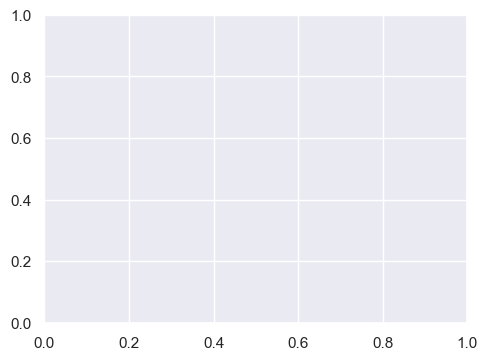

In [52]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

    The epochs history shows that accuracy gradually increases and achieved +83% accuracy on both training and validation set, but at the end the model starts overfitting training data.

/var/folders/9x/w4jkk26j04g1dx8dn4wgwb780000gn/T/ipykernel_21738/1624848565.py:13: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


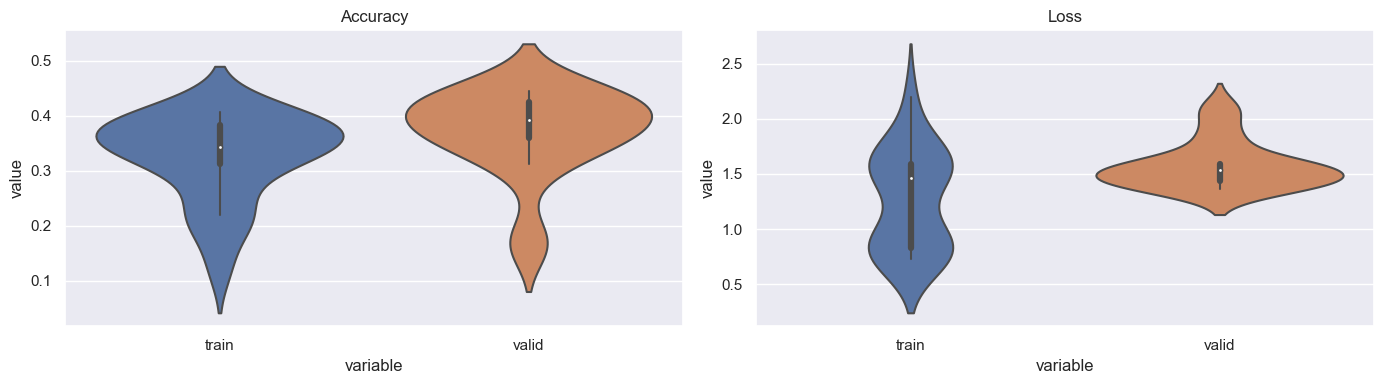

In [53]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()

 here is some free-form writing regarding the code you gave me:
The aforementioned code uses the accuracy and loss values from a machine learning model that has already been trained to build two dataframes, df_accu and df_loss. The Seaborn library is then used to generate two violin plots: one for accuracy and one for loss. The plots are then saved as an image file.
The accuracy results from the training and validation datasets are contained in the df_accu dataframe. The loss values from the training and validation datasets are contained in the df_loss dataframe.
Making a figure object is the initial step in constructing the violin plots. The size of the figure is (14, 4). For every plot, a subplot object is then created. The accuracy plot is represented by the first subplot, and the loss plot by the second.
The violin plots are created using the Seaborn library. The df_accu and df_loss dataframes serve as the data source for the violin visualisations. In each violin plot, the column names ('train' and 'valid') are the x-axis, while the associated values are the y-axis.
The plots have the titles "Accuracy" and "Loss" set. To make the plots easier to read, the distance between them has been adjusted.
The image file with the filename is stored with the figure 'performance_dist.png'.
After then, the plots are shown on the screen.
The distribution of the accuracy and loss values from the training dataset and the validation dataset may be seen using the violin charts. Any possible issues with the model, such as overfitting or underfitting, can be found using the plots.
Overfitting may be indicated, for instance, if the accuracy values for the training dataset are significantly greater than the accuracy values for the validation dataset. When a model learns training data too well and is unable to generalise to new data, this is known as overfitting.
The violin plots can be used to pinpoint any potential issues with the model and to tweak it so that it performs better.

91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step
total wrong validation predictions: 1607


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       399
           1       0.00      0.00      0.00        44
           2       0.28      0.15      0.20       414
           3       0.78      0.79      0.79       729
           4       0.25      0.30      0.27       494
           5       0.56      0.75      0.64       321
           6       0.29      0.53      0.37       499

    accuracy                           0.45      2900
   macro avg       0.31      0.36      0.32      2900
weighted avg       0.39      0.45      0.41      2900



/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

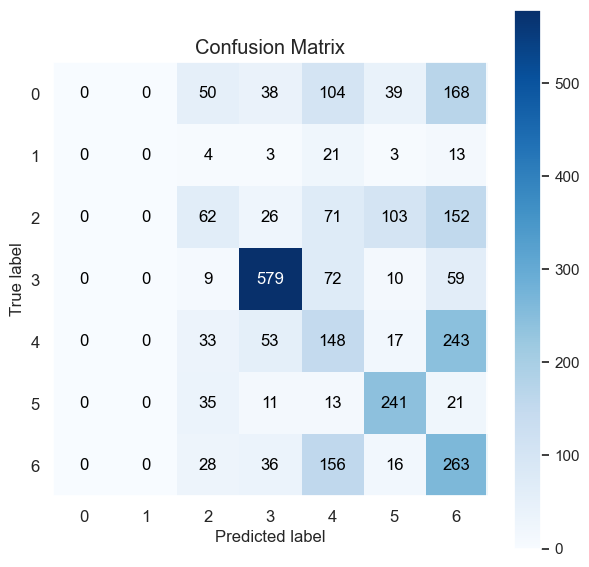

In [56]:
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

Yes, here is some free-form writing regarding the code you gave me:
Using the trained machine learning model, the code above predicts class labels for the validation dataset. After that, it outputs the total number of incorrect validation predictions and creates a confusion matrix diagram. A classification report for the validation dataset is printed at the end.
The model's accuracy is shown graphically in the confusion matrix diagram. It displays the number of cases that were correctly classified and the number of cases that were mistakenly classified. More specific details regarding the model's performance may be found in the classification report. It contains each class's F1 score, recall, and precision.
The accuracy can be defined as the percentage of accurately categorised positive cases among all positive cases. The recall is the percentage of true positive cases among all true positive cases that are accurately categorised as positive. A weighted harmonic mean of recall and precision is called the F1-score. Due to its consideration of both true positives and false positives, it provides a more complete measure of accuracy than accuracy alone.
You can utilise the categorization report to find any possible issues with the model. For instance, low precision or recall for a certain class may indicate that the model is underperforming in that class. 
To enhance the model's performance in that class, modifications can be made.

The classification report and the confusion matrix plot can be used to assess the model's performance and make necessary modifications to enhance it.
The confusion matrix demonstrates unequivocally that while our model performs well in the joyful class, it performs poorly in the other two classes. The fact that there is less data for these two classifications may be one of the causes of this. However, after looking at the pictures, I discovered that in some of these two groups, it's even difficult for a human to determine if an individual is happy or depressed. A person's facial expression varies as well. A person's neutral expression might convey sadness.

In [57]:
mapper = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/var/folders/9x/w4jkk26j04g1dx8dn4wgwb780000gn/T/ipykernel_21738/26852719.py:26: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


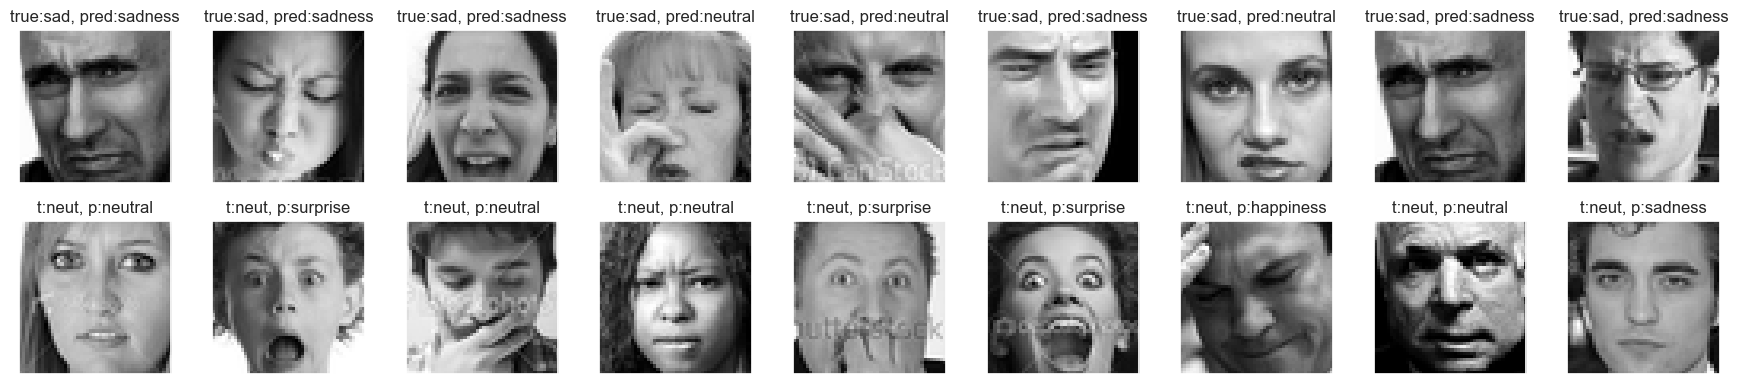

In [58]:
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=9)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
        ax = pyplot.subplot(2, 9, i+1)
        sample_img = X_valid[sadidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)

        ax.set_title(f"true:sad, pred:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        ax = pyplot.subplot(2, 9, i+10)
        sample_img = X_valid[neuidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)
        
        ax.set_title(f"t:neut, p:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        pyplot.tight_layout()

Indeed, here is some free-form writing regarding the code you gave me:
The aforementioned code creates a figure with eighteen images: nine randomly selected sad faces from the validation dataset and nine randomly selected neutral faces. To ensure that the same set of random numbers is created each time the code is run, the random seed is first set to a fixed value of 2.
The code then chooses nine image indices at random from the validation dataset that match the label for the "sad" emotion. The indices of the photos with the "sad" label are found using NumPy's where function, and nine random indices are chosen using the choice function.
The code then carries out the same action again, However, this time, it chooses nine image indices from the validation dataset that match the label for "neutral" mood.

The code then generates a new figure with one row and eighteen columns, whose size is set to eighteen four inches.
The nine pairs of indices that correspond to the arbitrary "sad" and "neutral" images are then iterated over by the code. The following is what the code does for each pair of indices:
At the i-th place in the upper row of the picture, it generates a new subplot.
For the "sad" image at the current index, it retrieves the image data.
On the subplot, it shows the "sad" image in grayscale.
The subplot's x-axis ticks are eliminated.
The subplot's y-axis ticks are eliminated.
In order to use the grayscale image as an input for the machine learning model, it is converted to RGB format.
The predicted label (obtained by running the image through the trained machine learning model) and the true label ("sad") are placed as the subplot's title.
The "neutral" photos then go through the same procedure again in the code.

Lastly, to avoid subplots overlapping, the algorithm modifies the distance between each one.
The machine learning model's performance can be visually assessed using the figure produced by the code. One way to assess the model would be to see how well it can differentiate between neutral and depressed facial expressions. The image can also be used to detect overfitting or underfitting, two possible issues with the model.
Overfitting may be evident, for instance, if the model predicts that every sad face is neutral. When a model learns training data too well and is unable to generalise to new data, this is known as overfitting.

It may indicate underfitting if the model predicts that every neutral face would be depressed. When the model is unable to acquire the training data sufficiently, underfitting takes place.
The figure can be used to pinpoint any potential issues with the model and to modify it so that it operates better.

In [60]:
test_data = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_test.csv')

In [61]:
test_data.head()

,id,pixels
0,640,123 109 128 142 103 113 145 179 178 158 177 19...
1,6081,41 41 41 41 42 42 42 45 39 16 10 10 7 9 9 5 8 ...
2,11137,248 228 211 197 194 181 195 180 185 189 193 18...
3,6793,158 181 192 200 193 179 133 167 219 211 164 19...
4,5932,195 185 166 165 149 98 89 83 65 183 75 65 67 6...


In [62]:
img_array_test = test_data.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48,48).astype('float32'))
img_array_test = np.stack(img_array_test,axis=0)

In [63]:
img_array_test.shape

(6887, 48, 48)

In [64]:
image_features_test = []
for i in range(len(img_array_test)):
    temp = cv2.cvtColor(img_array_test[i],cv2.COLOR_GRAY2RGB)
    image_features_test.append(temp)
    
image_features_test = np.array(image_features_test)
print(image_features_test.shape)

(6887, 48, 48, 3)


In [65]:
image_features_test = image_features_test / 255.

In [66]:
image_features_test.shape

(6887, 48, 48, 3)

In [67]:
from tensorflow import keras

In [68]:
model_test = keras.models.load_model('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/Report/best_model.keras')

In [69]:
result = model_test.predict(image_features_test)

216/216 ━━━━━━━━━━━━━━━━━━━━ 43s 199ms/step


This code uses a trained model called model_test to make predictions on a new dataset called image_features_test.
 
The output of the prediction is stored in a variable called result. The exact format of result depends on the specific problem being solved and the architecture of the neural network, but it likely contains a set of predicted class probabilities or a set of predicted class labels for each input image in image_features_tes

In [70]:
id = test_data.id

In [71]:
predition = []

for i in range(result.shape[0]):
    predition.append(result[i].argmax())
    

This code probably transforms a set of anticipated class probabilities into a set of predicted class labels, which is the result of the model_test.predict() method.
The number of images in the image_features_test, n_samples, and the number of classes being predicted, n_classes, make up the result variable, which is a NumPy array of shape (n_samples, n_classes).
Using the argmax() function, the for loop iterates over each row of the result array, or each image in the dataset, determining the index of the row's maximum value. The anticipated class label for the image is reflected in this index.
Next, the anticipated class labels are kept in a list named prediction.

In [72]:
final_df = pd.DataFrame({'id':id,'emotion':predition})

A new Pandas DataFrame named final_df is created by this code. The id and mood columns make up the DataFrame.

The emotion column holds the anticipated class labels produced by the prediction list, whereas the id column most likely contains unique identifiers for every image in the dataset.

A dictionary is passed as an argument to the pd.DataFrame() function, with the column names serving as the dictionary's keys and the data to be placed in the columns as its values. The values for the id and emotion columns are handed in from the id and predition lists, respectively.

In [74]:
final_df.emotion.value_counts()
final_df.to_csv('CNN_Prediction_submission.csv',index=False)

### ResNet50 Model


In [80]:
# Load the training and testing data for ResNet50 model
df = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_train.csv')
test_data = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_test.csv')


In [81]:
# Preprocess the data for ResNet50 model
img_array_resnet = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array_resnet = np.stack(img_array_resnet, axis=0)
img_array_test_resnet = test_data.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array_test_resnet = np.stack(img_array_test_resnet, axis=0)

In [82]:
# Convert grayscale images to RGB for ResNet50 model
img_features_resnet = []
for i in range(len(img_array_resnet)):
    temp = cv2.cvtColor(img_array_resnet[i], cv2.COLOR_GRAY2RGB)
    img_features_resnet.append(temp)
img_features_resnet = np.array(img_features_resnet)

In [83]:
image_features_test_resnet = []
for i in range(len(img_array_test_resnet)):
    temp = cv2.cvtColor(img_array_test_resnet[i], cv2.COLOR_GRAY2RGB)
    image_features_test_resnet.append(temp)
image_features_test_resnet = np.array(image_features_test_resnet)

In [84]:
# Preprocess the labels for ResNet50 model
le = LabelEncoder()
img_labels_resnet = le.fit_transform(df.emotion)
img_labels_resnet = np_utils.to_categorical(img_labels_resnet)

In [85]:
# Split the data into training and validation sets for ResNet50 model
X_train_resnet, X_valid_resnet, y_train_resnet, y_valid_resnet = train_test_split(img_features_resnet, img_labels_resnet, 
                                                                                  shuffle=True, stratify=img_labels_resnet, 
                                                                                  test_size=0.1, random_state=42)


In [87]:
from keras.applications import ResNet50

# Load the pre-trained ResNet50 model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


In [88]:
# Freeze the base model layers
for layer in base_model_resnet.layers:
    layer.trainable = False

In [89]:
# Define the top model architecture for ResNet50
top_model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


In [90]:
# Compile the ResNet50 model
top_model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [91]:
# Train the ResNet50 model
history_resnet = top_model_resnet.fit(X_train_resnet, y_train_resnet, batch_size=64, epochs=25, validation_data=(X_valid_resnet, y_valid_resnet))


Epoch 1/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 59s 138ms/step - accuracy: 0.3139 - loss: 2.1302 - val_accuracy: 0.3979 - val_loss: 1.5542
Epoch 2/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 56s 137ms/step - accuracy: 0.3830 - loss: 1.5999 - val_accuracy: 0.4203 - val_loss: 1.5182
Epoch 3/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 364s 894ms/step - accuracy: 0.4010 - loss: 1.5507 - val_accuracy: 0.4334 - val_loss: 1.4858
Epoch 4/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 56s 137ms/step - accuracy: 0.4147 - loss: 1.5281 - val_accuracy: 0.4366 - val_loss: 1.4765
Epoch 5/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 58s 143ms/step - accuracy: 0.4297 - loss: 1.4888 - val_accuracy: 0.4490 - val_loss: 1.4721
Epoch 6/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 57s 140ms/step - accuracy: 0.4346 - loss: 1.4698 - val_accuracy: 0.4452 - val_loss: 1.4658
Epoch 7/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 57s 140ms/step - accuracy: 0.4440 - loss: 1.4520 - val_accuracy: 0.4524 - val_loss: 1.4631
Epoch 8/25
408/408 ━━━━━━━━━━━━━━━━━━━━ 121s 297ms/step - accuracy: 0.4512 - loss:

In [92]:
# Evaluate the ResNet50 model on the training data
train_loss_resnet, train_acc_resnet = top_model_resnet.evaluate(X_train_resnet, y_train_resnet)
print('ResNet50 Model Training Accuracy:', train_acc_resnet)


816/816 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - accuracy: 0.6615 - loss: 0.9102
ResNet50 Model Training Accuracy: 0.6625670790672302


In [93]:
# Make predictions on the test data using ResNet50 model
predicted_emotions_prob_resnet = top_model_resnet.predict(image_features_test_resnet)
predicted_emotions_resnet = np.argmax(predicted_emotions_prob_resnet, axis=1)


216/216 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step


In [94]:
# Create the DataFrame with the predicted emotions and corresponding IDs for ResNet50 model
output_df_resnet = pd.DataFrame({'id': test_data['id'], 'emotion': predicted_emotions_resnet})



In [96]:
output_df_resnet.head(5)

,id,emotion
0,640,2
1,6081,2
2,11137,5
3,6793,5
4,5932,5


In [97]:
# Save the output DataFrame to a CSV file for ResNet50 model
output_df_resnet.to_csv('predicted_emotions_resnet50.csv', index=False)

# ResNetSolo

In [4]:
df = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_train.csv')
print(df.shape)
df.head()

(29000, 3)


,id,emotion,pixels
0,9415,6,29 16 18 18 18 20 19 18 17 17 17 18 17 18 17 1...
1,19109,3,126 154 167 181 188 194 195 194 196 195 198 20...
2,21523,2,169 220 218 208 184 144 72 73 143 183 203 210 ...
3,2076,3,60 64 72 80 83 83 80 82 89 106 114 125 125 127...
4,13957,3,174 148 121 97 78 70 62 57 54 54 42 58 40 64 1...


In [5]:
df.emotion.unique()

array([6, 3, 2, 4, 5, 0, 1])

In [6]:
# Mapping Emotion Labels to Text

# The code below creates a dictionary that maps emotion labels to text. The dictionary can be used to convert emotion labels to human-readable text.

# ```python
emotion_label_to_text = {
    0: "anger",
    1: "disgust",
    2: "fear",
    3: "happiness",
    4: "sadness",
    5: "surprise",
    6: "neutral",
}

In [9]:
df.emotion.value_counts()

emotion
3    7289
6    4992
4    4942
2    4138
0    3993
5    3206
1     440
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(29000, 7)

In [19]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


`Splitting the data into training and validation set.`

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(img_features, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((26100, 48, 48, 3), (2900, 48, 48, 3), (26100, 7), (2900, 7))

In [21]:
del df
del img_array
del img_labels

In [22]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [23]:
# Normalizing results, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

In [24]:
ResNet50 = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(48, 48, 3)
)

In [25]:
ResNet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [26]:
def build_model(bottom_model, classes):
    top_model = bottom_model.layers[-2].output
    top_model = Dropout(0.3, name='dropout_1')(top_model)
    top_model = GlobalAveragePooling2D()(top_model)

    top_model = Flatten(name='flatten')(top_model)
    top_model = Dense(1024, activation='relu', name='dense_1')(top_model)
    top_model = BatchNormalization(name='batchnorm_1')(top_model)
    top_model = Dropout(0.3, name='dropout_11')(top_model)
    
    top_model = Dense(512, activation='relu', name='dense_2')(top_model)
    top_model = BatchNormalization(name='batchnorm_11')(top_model)
    top_model = Dropout(0.3, name='dropout_2')(top_model)

    top_model = Dense(64, activation='relu', name='dense_3')(top_model)
    top_model = Dense(classes, activation='softmax', name='out_layer')(top_model)
    
    return top_model

In [27]:
FC_Head = build_model(ResNet50, num_classes)

model = Model(inputs = ResNet50.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 26,250,119 (100.14 MB)

 Trainable params: 26,193,927 (99.92 MB)

 Non-trainable params: 56,192 (219.50 KB)

None


In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

checkpoint = ModelCheckpoint(
    'best_model.keras',  # Change filepath to end with .keras extension
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)

# Group the callbacks together
callbacks = [
    early_stopping,
    lr_scheduler,
    checkpoint
]


In [29]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [32]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 25
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(learning_rate=0.0001),
]

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with adam as it is more popular.
model.compile(
    loss='categorical_crossentropy',
    optimizer=optims[1],
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=int(len(X_train) / batch_size),  # Convert to integer
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.5191 - loss: 1.2745
Epoch 1: val_accuracy improved from 0.51621 to 0.55931, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 363s 445ms/step - accuracy: 0.5191 - loss: 1.2745 - val_accuracy: 0.5593 - val_loss: 1.2057 - learning_rate: 1.0000e-04
Epoch 2/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 5:57 439ms/step - accuracy: 0.5312 - loss: 1.0816

2024-04-02 15:44:14.631168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_accuracy did not improve from 0.55931
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5312 - loss: 0.5415 - val_accuracy: 0.5579 - val_loss: 1.2133 - learning_rate: 1.0000e-04
Epoch 3/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.5420 - loss: 1.2203
Epoch 3: val_accuracy improved from 0.55931 to 0.56034, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 355s 435ms/step - accuracy: 0.5420 - loss: 1.2203 - val_accuracy: 0.5603 - val_loss: 1.1472 - learning_rate: 1.0000e-04
Epoch 4/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 6:10 456ms/step - accuracy: 0.6250 - loss: 1.0322

2024-04-02 15:50:16.217125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_accuracy improved from 0.56034 to 0.56172, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6250 - loss: 0.5168 - val_accuracy: 0.5617 - val_loss: 1.1458 - learning_rate: 1.0000e-04
Epoch 5/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.5558 - loss: 1.1862
Epoch 5: val_accuracy improved from 0.56172 to 0.56828, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 353s 433ms/step - accuracy: 0.5558 - loss: 1.1862 - val_accuracy: 0.5683 - val_loss: 1.1409 - learning_rate: 1.0000e-04
Epoch 6/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 6:22 470ms/step - accuracy: 0.5625 - loss: 1.1780

2024-04-02 15:56:16.108387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_accuracy did not improve from 0.56828
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5625 - loss: 0.5897 - val_accuracy: 0.5683 - val_loss: 1.1485 - learning_rate: 1.0000e-04
Epoch 7/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.5651 - loss: 1.1711
Epoch 7: val_accuracy improved from 0.56828 to 0.59310, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 353s 433ms/step - accuracy: 0.5651 - loss: 1.1711 - val_accuracy: 0.5931 - val_loss: 1.1139 - learning_rate: 1.0000e-04
Epoch 8/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 6:02 446ms/step - accuracy: 0.5625 - loss: 1.1978

2024-04-02 16:02:15.863575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_accuracy did not improve from 0.59310
815/815 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5625 - loss: 0.5997 - val_accuracy: 0.5917 - val_loss: 1.1153 - learning_rate: 1.0000e-04
Epoch 9/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.5752 - loss: 1.1249
Epoch 9: val_accuracy did not improve from 0.59310
815/815 ━━━━━━━━━━━━━━━━━━━━ 352s 432ms/step - accuracy: 0.5752 - loss: 1.1249 - val_accuracy: 0.5783 - val_loss: 1.1127 - learning_rate: 1.0000e-04
Epoch 10/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 7:32 556ms/step - accuracy: 0.5312 - loss: 1.1547

2024-04-02 16:08:14.317386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_accuracy did not improve from 0.59310
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5312 - loss: 0.5781 - val_accuracy: 0.5797 - val_loss: 1.1102 - learning_rate: 1.0000e-04
Epoch 11/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.5824 - loss: 1.1120
Epoch 11: val_accuracy did not improve from 0.59310
815/815 ━━━━━━━━━━━━━━━━━━━━ 356s 436ms/step - accuracy: 0.5824 - loss: 1.1120 - val_accuracy: 0.5910 - val_loss: 1.0725 - learning_rate: 1.0000e-04
Epoch 12/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 8:21 616ms/step - accuracy: 0.7188 - loss: 1.0568

2024-04-02 16:14:16.677845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_accuracy did not improve from 0.59310
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7188 - loss: 0.5290 - val_accuracy: 0.5903 - val_loss: 1.0737 - learning_rate: 1.0000e-04
Epoch 13/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.5948 - loss: 1.0867
Epoch 13: val_accuracy did not improve from 0.59310
815/815 ━━━━━━━━━━━━━━━━━━━━ 359s 441ms/step - accuracy: 0.5948 - loss: 1.0867 - val_accuracy: 0.5697 - val_loss: 1.2361 - learning_rate: 1.0000e-04
Epoch 14/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 6:29 478ms/step - accuracy: 0.5938 - loss: 1.0602

2024-04-02 16:20:23.111463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 14: val_accuracy did not improve from 0.59310
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5938 - loss: 0.5307 - val_accuracy: 0.5669 - val_loss: 1.2597 - learning_rate: 1.0000e-04
Epoch 15/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.6148 - loss: 1.0497
Epoch 15: val_accuracy improved from 0.59310 to 0.61448, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 354s 434ms/step - accuracy: 0.6148 - loss: 1.0497 - val_accuracy: 0.6145 - val_loss: 1.0235 - learning_rate: 5.0000e-05
Epoch 16/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 6:09 454ms/step - accuracy: 0.5938 - loss: 1.0582

2024-04-02 16:26:23.473610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_accuracy improved from 0.61448 to 0.61586, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5938 - loss: 0.5298 - val_accuracy: 0.6159 - val_loss: 1.0237 - learning_rate: 5.0000e-05
Epoch 17/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.6325 - loss: 0.9873
Epoch 17: val_accuracy improved from 0.61586 to 0.62931, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 359s 440ms/step - accuracy: 0.6325 - loss: 0.9873 - val_accuracy: 0.6293 - val_loss: 1.0148 - learning_rate: 5.0000e-05
Epoch 18/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 6:18 466ms/step - accuracy: 0.6250 - loss: 0.9880

2024-04-02 16:32:29.633745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 18: val_accuracy did not improve from 0.62931
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6250 - loss: 0.4946 - val_accuracy: 0.6290 - val_loss: 1.0161 - learning_rate: 5.0000e-05
Epoch 19/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.6396 - loss: 0.9748
Epoch 19: val_accuracy improved from 0.62931 to 0.63483, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 372s 456ms/step - accuracy: 0.6396 - loss: 0.9748 - val_accuracy: 0.6348 - val_loss: 0.9898 - learning_rate: 5.0000e-05
Epoch 20/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 6:24 472ms/step - accuracy: 0.5625 - loss: 1.1009

2024-04-02 16:38:48.153483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 20: val_accuracy did not improve from 0.63483
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5625 - loss: 0.5511 - val_accuracy: 0.6348 - val_loss: 0.9901 - learning_rate: 5.0000e-05
Epoch 21/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.6517 - loss: 0.9565
Epoch 21: val_accuracy did not improve from 0.63483
815/815 ━━━━━━━━━━━━━━━━━━━━ 373s 458ms/step - accuracy: 0.6517 - loss: 0.9565 - val_accuracy: 0.6348 - val_loss: 1.0034 - learning_rate: 5.0000e-05
Epoch 22/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 7:26 549ms/step - accuracy: 0.6250 - loss: 1.0286

2024-04-02 16:45:08.119027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 22: val_accuracy did not improve from 0.63483
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6250 - loss: 0.5149 - val_accuracy: 0.6328 - val_loss: 1.0038 - learning_rate: 5.0000e-05
Epoch 23/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.6480 - loss: 0.9499
Epoch 23: val_accuracy did not improve from 0.63483
815/815 ━━━━━━━━━━━━━━━━━━━━ 347s 426ms/step - accuracy: 0.6480 - loss: 0.9499 - val_accuracy: 0.6279 - val_loss: 1.0289 - learning_rate: 5.0000e-05
Epoch 24/25
  1/815 ━━━━━━━━━━━━━━━━━━━━ 8:04 596ms/step - accuracy: 0.6562 - loss: 0.8375

2024-04-02 16:51:01.870879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 24: val_accuracy did not improve from 0.63483
815/815 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6562 - loss: 0.4193 - val_accuracy: 0.6276 - val_loss: 1.0288 - learning_rate: 5.0000e-05
Epoch 25/25
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.6485 - loss: 0.9424
Epoch 25: val_accuracy improved from 0.63483 to 0.63931, saving model to best_model.keras
815/815 ━━━━━━━━━━━━━━━━━━━━ 350s 429ms/step - accuracy: 0.6485 - loss: 0.9424 - val_accuracy: 0.6393 - val_loss: 1.0003 - learning_rate: 5.0000e-05
Restoring model weights from the end of the best epoch: 25.


In [35]:
import yaml

# Convert model architecture to YAML-compatible dictionary
model_config = model.get_config()
model_yaml = yaml.dump(model_config)

# Save model architecture to YAML file
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

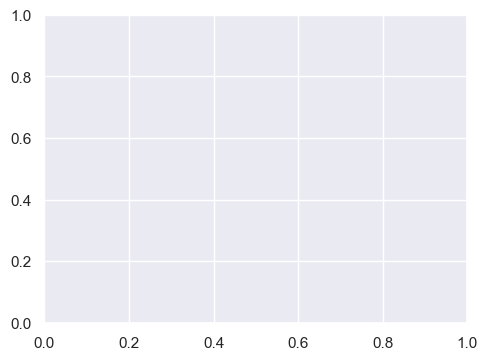

In [36]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

/var/folders/9x/w4jkk26j04g1dx8dn4wgwb780000gn/T/ipykernel_40707/1624848565.py:13: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


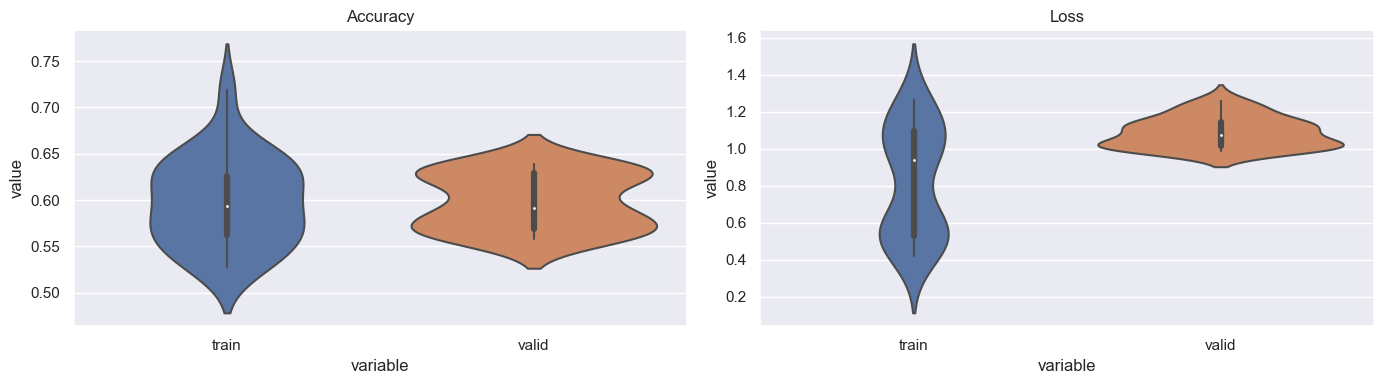

In [37]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()

91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step
total wrong validation predictions: 1046


              precision    recall  f1-score   support

           0       0.57      0.60      0.58       399
           1       0.57      0.39      0.46        44
           2       0.53      0.40      0.46       414
           3       0.87      0.83      0.85       729
           4       0.53      0.46      0.49       494
           5       0.72      0.76      0.74       321
           6       0.52      0.71      0.60       499

    accuracy                           0.64      2900
   macro avg       0.62      0.59      0.60      2900
weighted avg       0.64      0.64      0.64      2900



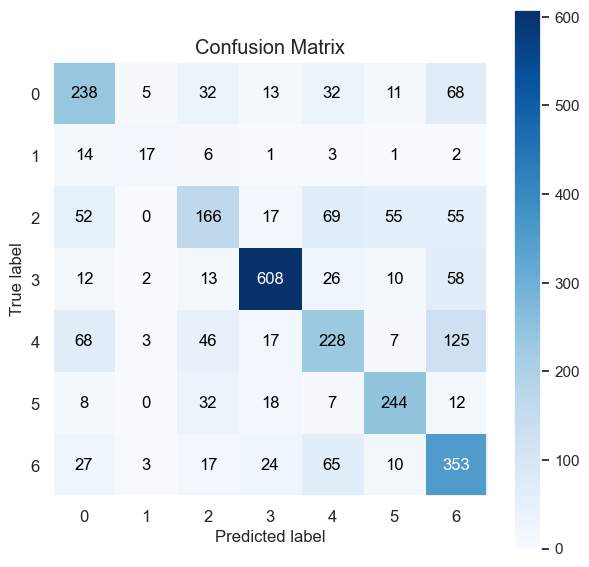

In [38]:
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

The confusion matrix clearly shows that our model is doing good job on the class `happy` but it's performance is low on other two classes. One of the reason for this could be the fact that these two classes have less data. But when I looked at the images I found some images from these two classes are even hard for a human to tell whether the person is sad or neutral. Facial expression depends on individual as well. Some person's neutral face looks like sad.

In [39]:
mapper = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/var/folders/9x/w4jkk26j04g1dx8dn4wgwb780000gn/T/ipykernel_40707/26852719.py:26: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


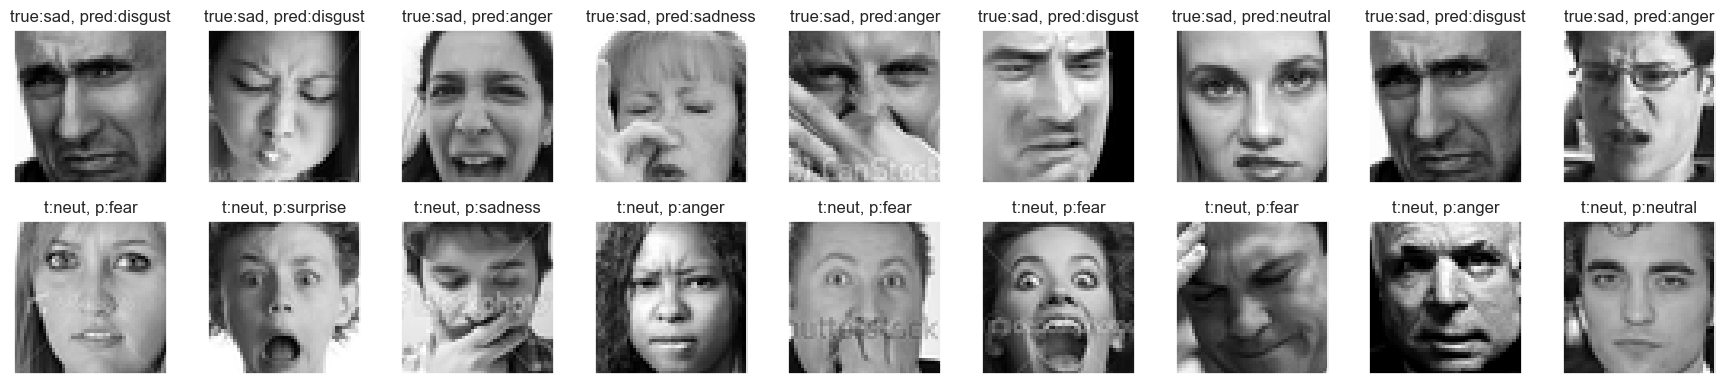

In [40]:
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=9)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
        ax = pyplot.subplot(2, 9, i+1)
        sample_img = X_valid[sadidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)

        ax.set_title(f"true:sad, pred:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        ax = pyplot.subplot(2, 9, i+10)
        sample_img = X_valid[neuidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)
        
        ax.set_title(f"t:neut, p:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        pyplot.tight_layout()

In [41]:
test_data = pd.read_csv('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/deeplearning-assignment-data/my_emotion_test.csv')

In [42]:
test_data.head()

,id,pixels
0,640,123 109 128 142 103 113 145 179 178 158 177 19...
1,6081,41 41 41 41 42 42 42 45 39 16 10 10 7 9 9 5 8 ...
2,11137,248 228 211 197 194 181 195 180 185 189 193 18...
3,6793,158 181 192 200 193 179 133 167 219 211 164 19...
4,5932,195 185 166 165 149 98 89 83 65 183 75 65 67 6...


In [43]:
X_train.shape

(26100, 48, 48, 3)

In [44]:
img_array_test = test_data.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48,48).astype('float32'))
img_array_test = np.stack(img_array_test,axis=0)

In [45]:
img_array_test.shape

(6887, 48, 48)

In [46]:
img_array_test.shape

(6887, 48, 48)

In [47]:
image_features_test = []
for i in range(len(img_array_test)):
    temp = cv2.cvtColor(img_array_test[i],cv2.COLOR_GRAY2RGB)
    image_features_test.append(temp)
    
image_features_test = np.array(image_features_test)
print(image_features_test.shape)

(6887, 48, 48, 3)


In [48]:
image_features_test.shape

(6887, 48, 48, 3)

In [49]:
X_train

array([[[[0.45490196, 0.45490196, 0.45490196],
         [0.44705883, 0.44705883, 0.44705883],
         [0.4509804 , 0.4509804 , 0.4509804 ],
         ...,
         [0.44313726, 0.44313726, 0.44313726],
         [0.4509804 , 0.4509804 , 0.4509804 ],
         [0.44705883, 0.44705883, 0.44705883]],

        [[0.45490196, 0.45490196, 0.45490196],
         [0.44705883, 0.44705883, 0.44705883],
         [0.4509804 , 0.4509804 , 0.4509804 ],
         ...,
         [0.4509804 , 0.4509804 , 0.4509804 ],
         [0.4509804 , 0.4509804 , 0.4509804 ],
         [0.44705883, 0.44705883, 0.44705883]],

        [[0.45490196, 0.45490196, 0.45490196],
         [0.44705883, 0.44705883, 0.44705883],
         [0.4509804 , 0.4509804 , 0.4509804 ],
         ...,
         [0.46666667, 0.46666667, 0.46666667],
         [0.44705883, 0.44705883, 0.44705883],
         [0.44705883, 0.44705883, 0.44705883]],

        ...,

        [[0.42745098, 0.42745098, 0.42745098],
         [0.4509804 , 0.4509804 , 0.4509804 ]

In [50]:
image_features_test = image_features_test / 255.

In [51]:
from tensorflow import keras

In [53]:
model_test = keras.models.load_model('/Users/nishantkhadse/Documents/GitHub/PythonProjects/PythonProjects/Untitled/ML_Assignment_2/Report/best_model.keras')

In [54]:
result = model_test.predict(image_features_test)

216/216 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step


In [55]:
result[0]

array([0.045312  , 0.00105278, 0.09164578, 0.10475042, 0.3981439 ,
       0.01178142, 0.3473137 ], dtype=float32)

In [56]:
id = test_data.id

In [57]:
predition = []

for i in range(result.shape[0]):
    predition.append(result[i].argmax())
    
 

In [58]:
final_df = pd.DataFrame({'id':id,'emotion':predition})
final_df.emotion.value_counts()

emotion
3    1636
6    1536
4    1080
0    1001
5     825
2     713
1      96
Name: count, dtype: int64

In [59]:
final_df.head()

,id,emotion
0,640,4
1,6081,3
2,11137,5
3,6793,3
4,5932,5


In [60]:
final_df.to_csv('Final_ResNet50_submission.csv',index=False)